<H1> Hello World <H1>

In [104]:
install.packages("skimr")
library(tidyverse)
library(tidymodels)
library(skimr)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



<H2> Loading the data set into R and wrangling it </H2>

In [105]:
# URL that contains the dataframe that we want to examine
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv"

# Reading dataframe into R
algerian_forest_fires <- read_csv(url,skip = 1)

# Examining the data frame
# algerian_forest_data

Parsed with column specification:
cols(
  day = col_character(),
  month = col_character(),
  year = col_character(),
  Temperature = col_character(),
  RH = col_character(),
  Ws = col_character(),
  Rain = col_character(),
  FFMC = col_character(),
  DMC = col_character(),
  DC = col_character(),
  ISI = col_character(),
  BUI = col_character(),
  FWI = col_character(),
  Classes = col_character()
)

Warning message:
“2 parsing failures.
row col   expected     actual                                                                                                       file
123  -- 14 columns 1 columns  'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
168  -- 14 columns 13 columns 'https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv'
”


<H3> After a quick examination we can see that:</H3>
    <li> File that we read contains 2 dataframes.</li>
    <li> The collumn types of the data set are not parsed correctly.</li>
    <li> We know that there is something causing parsing issues in the rows : 123 and 168.</li> 
<p> To extract the target data frame, we would need to split the file into 2 dataframes that it contains, tidy each dataframe and join them </p>

<H4>Extracting and tidying Bejaja region data set</H4>

In [106]:
# Retrieving the bejaja data set
bejaja_forest <- slice(algerian_forest_fires, 2:122)

#Fixing the collumn types of the numerical variables
bejaja_forest_data <- bejaja_forest %>% 
    select(day:FWI) %>% 
    map_df(as.numeric) 

# Selecting the observation class data
bejaja_forest_fires <- bejaja_forest %>% 
    select(Classes) 

# Joining numerical variable and observation class data 
bejaja_forest_tidy <- cbind(bejaja_forest_data,bejaja_forest_fires)
# head(bejaja_forest_tidy)

<H4>Extracting and tidying Sidi-Bel region data set</H4>

In [107]:
#Finding the number of rows in the original dataset
number_of_rows <- nrow(algerian_forest_fires)

# Retrieving the bejaja data set
sidi_bel_forest <- slice(algerian_forest_fires, 125:number_of_rows)

#Fixing the collumn types of the numerical variables
sidi_bel_forest_data <- sidi_bel_forest %>% 
    select(day:FWI) %>% 
    map_df(as.numeric)  

# Selecting the observation class data
sidi_bel_forest_fires <- sidi_bel_forest %>% 
    select(Classes)

# Joining numerical variable and observation class data 
sidi_bel_forest_tidy <- cbind(sidi_bel_forest_data,sidi_bel_forest_fires)

Warning message in .Primitive("as.double")(x, ...):
“NAs introduced by coercion”
Warning message in .Primitive("as.double")(x, ...):
“NAs introduced by coercion”


<H4>Joining our two new dataframes</H4> 

In [108]:
algerian_forest_fires_tidy <- full_join(bejaja_forest_tidy, sidi_bel_forest_tidy)
# algerian_forest_fires_tidy
# The resulting data frame is tidy and ready for the further analysis

Joining, by = c("day", "month", "year", "Temperature", "RH", "Ws", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "FWI", "Classes")



In [135]:
algerian_forest_fires_tidy <- mutate(algerian_forest_fires_tidy, Classes = as.factor(Classes))
summary_df <-  skim(algerian_forest_fires_tidy) %>% 
    tibble::as_tibble() %>% 
    select(skim_variable:numeric.sd)
summary_df

skim_variable,n_missing,complete_rate,factor.ordered,factor.n_unique,factor.top_counts,numeric.mean,numeric.sd
<chr>,<int>,<dbl>,<lgl>,<int>,<chr>,<dbl>,<dbl>
Classes,1,0.9958848,FALSE,2,"fir: 137, not: 105",NA,NA
day,0,1.0000000,NA,NA,NA,15.814815,8.792058
month,0,1.0000000,NA,NA,NA,7.506173,1.111065
year,0,1.0000000,NA,NA,NA,2012.000000,0.000000
Temperature,0,1.0000000,NA,NA,NA,32.185185,3.635606
RH,0,1.0000000,NA,NA,NA,61.958848,14.911528
Ws,0,1.0000000,NA,NA,NA,15.493827,2.811385
Rain,0,1.0000000,NA,NA,NA,0.763786,2.002933
FFMC,0,1.0000000,NA,NA,NA,77.937860,14.345698


Warning message:
“Removed 1 rows containing missing values (geom_point).”


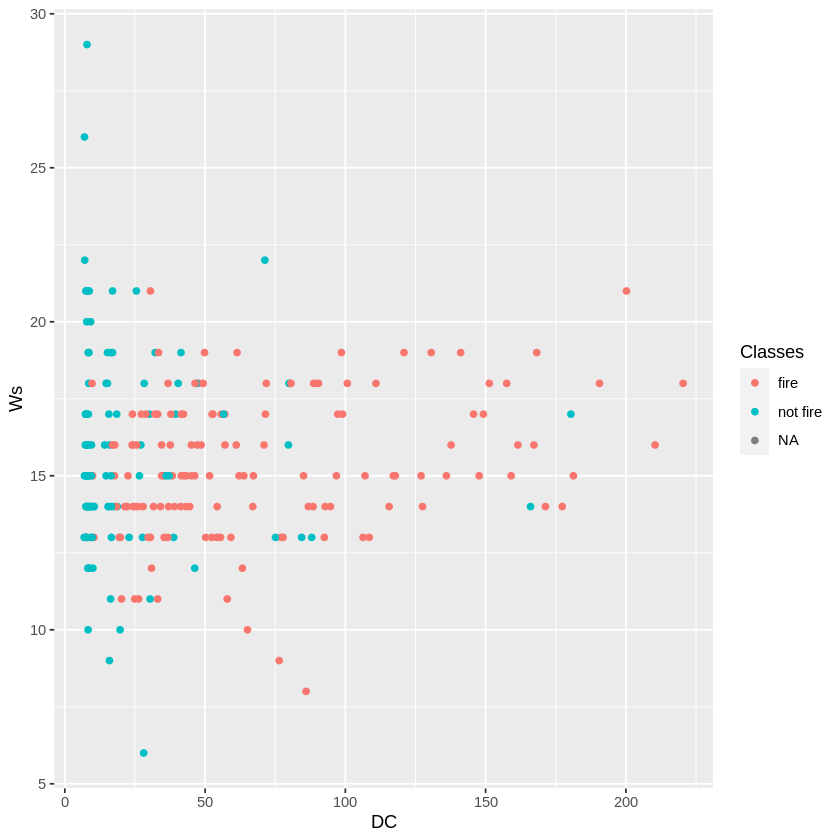

In [110]:
algerian_forest_plot <- algerian_forest_fires_tidy %>% 
    ggplot(aes(x = DC, y = Ws, color = Classes)) +
        geom_point()
algerian_forest_plot